In [1]:
import ase
from ase.io import read
import dscribe
from dscribe.descriptors import SOAP
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

from spyrmsd import rmsd

import pandas as pd


In [2]:
water9 = "/home/boittier/Documents/phd/ff_energy/ff_energy/sampling/12_TIP3.xyz"

trajwater9 = read(water9,index='::10') 

In [3]:
def soap(rcut=6.0, nmax=8, lmax=6, species=("H", "O"), average="inner", weighting=None):
    # Setting up the SOAP descriptor
    soap = SOAP(
        species=species,
        periodic=False,
        r_cut=rcut,
        n_max=nmax,
        l_max=lmax,
        average=average,
        weighting=weighting,
    )
    return soap

In [4]:
soap = soap()

In [5]:
water9soap = soap.create(trajwater9)
water9soap.shape

(5240, 952)

In [6]:
water9soap[0].shape

(952,)

In [7]:
cosine_similarity([water9soap[0]], water9soap)

array([[1.        , 0.99672981, 0.99160851, ..., 0.99851022, 0.99886948,
        0.99107122]])

In [8]:
# def rmsd(
#     coords1: np.ndarray,    # Coordinates of molecule 1
#     coords2: np.ndarray,    # Coordinates of molecule 2
#     aprops1: np.ndarray,    # Atomic properties of molecule 1
#     aprops2: np.ndarray,    # Atomic properties of molecule 2
#     center: bool = False,   # Flag to center molecules at origin
#     minimize: bool = False, # Flag to compute minimum RMSD
#     atol: float = 1e-9,     # Numerical tolerance for QCP method
# )

In [9]:
positions = [ _.get_positions() for _ in trajwater9]

In [10]:
atomic_numbers = trajwater9[0].get_atomic_numbers()

In [11]:
# rmsd.rmsd(, trajwater9[1].get_positions(), atomic_numbers, atomic_numbers)

In [12]:
AM = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0],
     [1, 1, 1, 0, 0, 0, 0, 0, 0],
     [1, 1, 1, 0, 0, 0,0, 0, 0],
     [0, 0, 0, 1, 1, 1, 0, 0, 0],
     [0, 0, 0, 1, 1, 1, 0, 0, 0],
     [0, 0, 0, 1, 1, 1,0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 1],
     [0, 0, 0, 0, 0, 0, 1, 1, 1],
     [0, 0, 0, 0, 0, 0, 1, 1, 1]])

# AM = np.ones((9,9))

In [13]:
AM.shape

(9, 9)

In [14]:
sym_rmsd = []
cosign_sim = []

for i in range(len(positions)):
    # sym_rmsd.append(rmsd.symmrmsd(positions[i], positions, atomic_numbers, atomic_numbers, AM, AM, center=True, minimize=True))
    cosign_sim.append(cosine_similarity([water9soap[i]], water9soap))

In [27]:
DATA = pd.DataFrame([_[0] for _ in cosign_sim])


In [16]:
DATA.sum().sort_values()

2599    5072.354208
2002    5098.565305
3163    5098.756193
1080    5102.423142
3033    5105.651421
           ...     
1077    5226.225157
3842    5226.261040
3482    5226.272105
1853    5226.284368
4721    5226.361820
Length: 5240, dtype: float64

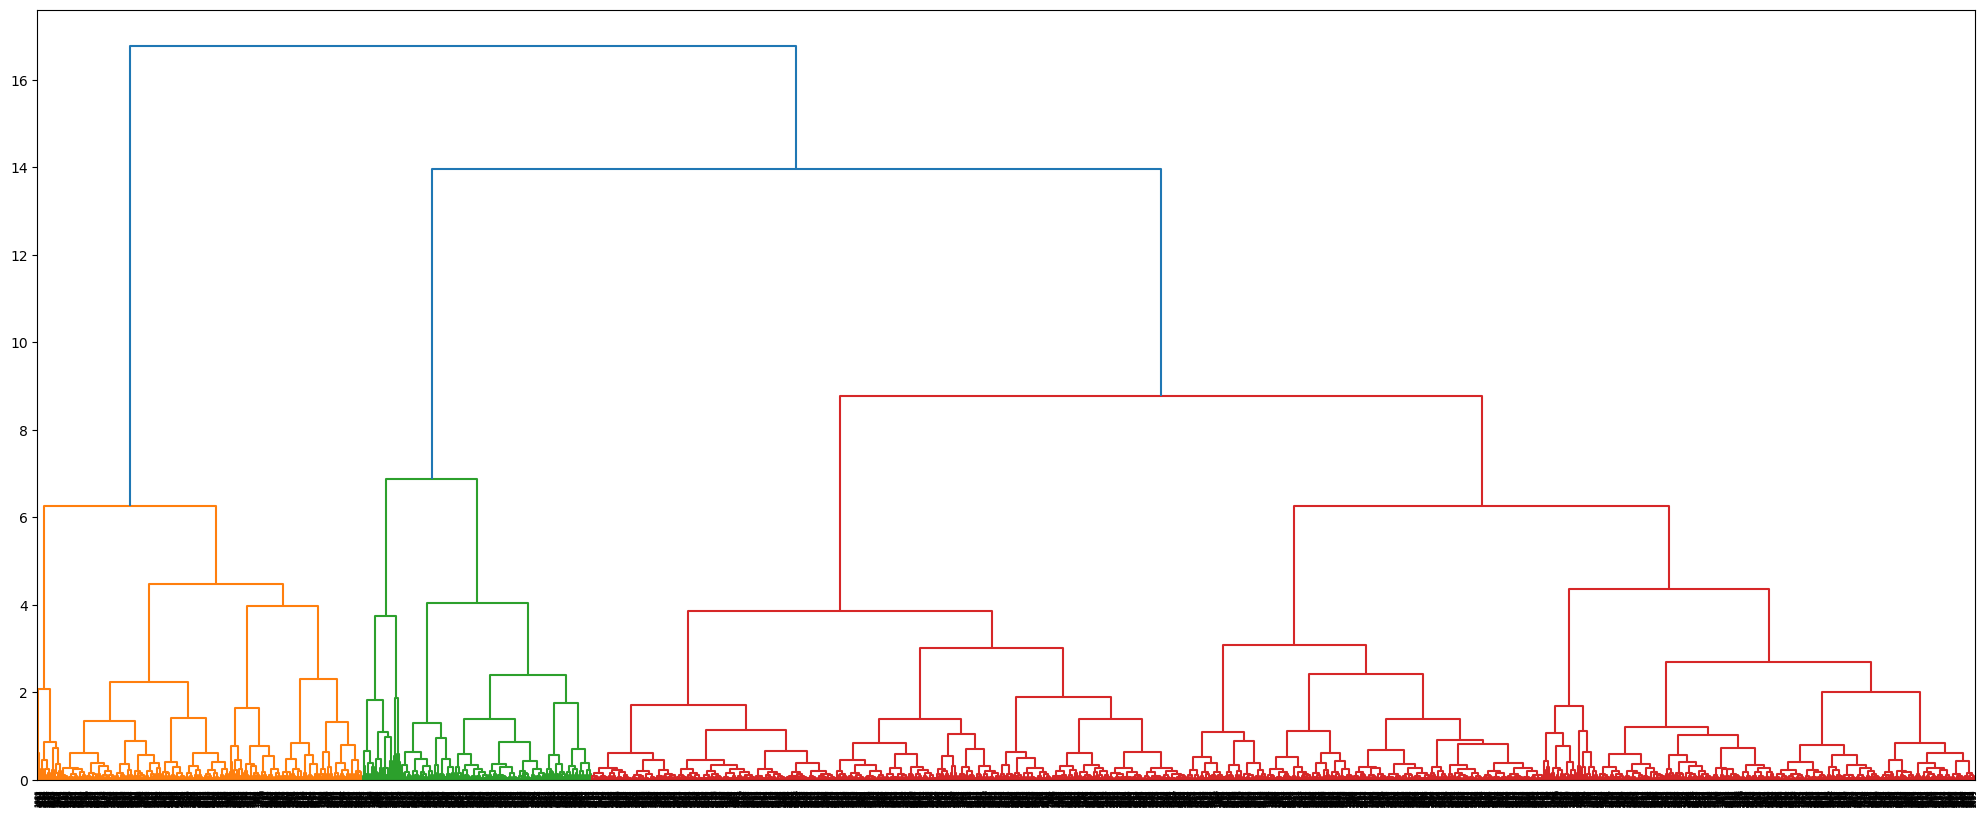

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(DATA, 'ward')
fig = plt.figure(figsize=(25.0, 10.0))
dn = dendrogram(Z, get_leaves=True, distance_sort=True)

In [26]:
DATA

,0,1,2,3,4,5,6,7,8,9,...,5232,5233,5234,5235,5236,5237,5238,5239,SUM,LABELS
2599,0.960603,0.944037,0.966828,0.959656,0.976123,0.971154,0.957267,0.977718,0.978767,0.960245,...,0.946876,0.980492,0.979251,0.978589,0.968607,0.954003,0.968439,0.961116,5072.354208,35
2002,0.969579,0.952247,0.972182,0.967527,0.979790,0.976845,0.963144,0.981373,0.984173,0.962874,...,0.955762,0.983464,0.980047,0.983272,0.976949,0.962203,0.975768,0.964706,5098.565305,231
3163,0.970135,0.953334,0.971201,0.967943,0.980388,0.976670,0.962870,0.981242,0.984296,0.962536,...,0.956681,0.983073,0.979912,0.983030,0.977281,0.963149,0.975658,0.964598,5098.756193,231
1080,0.972745,0.987529,0.971329,0.978794,0.971718,0.973163,0.983379,0.967621,0.966130,0.982408,...,0.983870,0.965476,0.965671,0.965308,0.967747,0.981141,0.972810,0.984589,5102.423142,89
3033,0.970608,0.953740,0.973879,0.968792,0.981031,0.978230,0.964843,0.982805,0.985127,0.964829,...,0.957225,0.984740,0.981506,0.984469,0.977967,0.963516,0.976848,0.966427,5105.651421,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,0.996451,0.994519,0.997556,0.998438,0.998909,0.999708,0.998413,0.998359,0.998750,0.995971,...,0.995746,0.997713,0.995064,0.998624,0.997818,0.997286,0.999015,0.997983,5226.225157,419
3842,0.996023,0.994070,0.998002,0.998124,0.998769,0.999731,0.998535,0.998519,0.998572,0.996378,...,0.995243,0.997957,0.995414,0.998726,0.997430,0.996799,0.998830,0.998216,5226.261040,419
3482,0.995940,0.994059,0.997523,0.998097,0.999113,0.999645,0.998283,0.998514,0.998739,0.996182,...,0.995250,0.997963,0.995604,0.998735,0.997423,0.996914,0.998707,0.998154,5226.272105,419
1853,0.994984,0.993238,0.998225,0.997466,0.998942,0.999753,0.998577,0.998945,0.998401,0.997145,...,0.994468,0.998406,0.996306,0.998823,0.996785,0.996066,0.998281,0.998545,5226.284368,729


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=100, random_state=0, n_init="auto").fit(DATA)

In [29]:
kmeans.labels_

array([65,  3, 94, ..., 21, 85, 17], dtype=int32)

In [30]:
TESTDATA = DATA.to_numpy() 

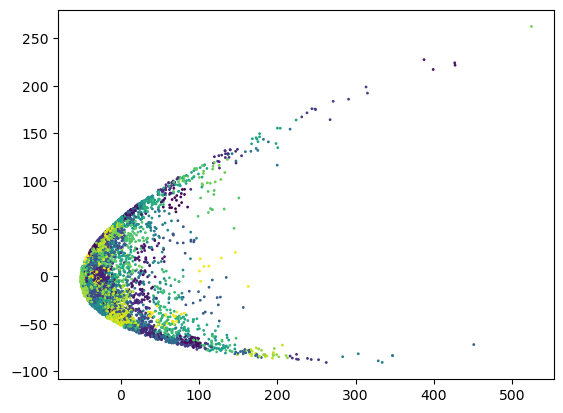

In [31]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
PCA = pca.fit_transform(StandardScaler().fit_transform(DATA)).T

plt.scatter(PCA[0], PCA[1], c=kmeans.labels_, s=1)


In [32]:
DATA["SUM"] =  DATA.sum()

In [33]:
DATA["LABELS"] = kmeans.labels_ 


In [34]:
DATA = DATA.sort_values("SUM")

In [35]:
keys = []
indexes = []
for row in DATA[["SUM", "LABELS"]].iterrows():
    k = row[1][1]
    if k not in keys:
        keys.append(k)
        indexes.append(row[0])
        # print(row[0], int(k))

In [36]:
print(len(set(indexes)))

100


In [38]:
from ase.io import write

In [39]:
# trajwater9[indexes]

In [40]:
for i, idx in enumerate(indexes):
    write(f"tetramers/{i}.xyz", trajwater9[idx])

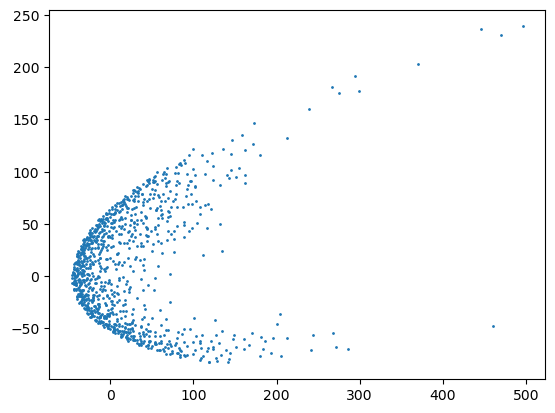

In [245]:
plt.scatter(PCA[0][indexes], PCA[1][indexes], 
            # c=dn["leaves_color_list"][indexes],
            s=1, alpha=1)

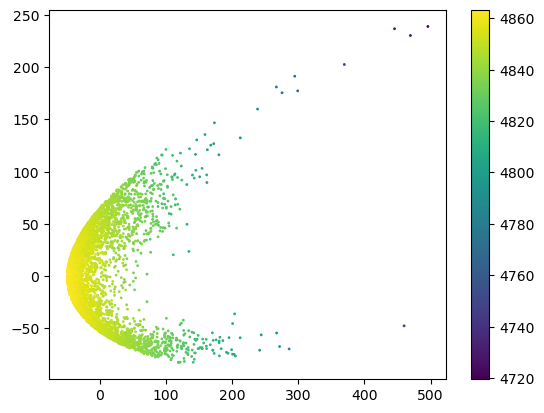

In [207]:
plt.scatter(PCA[0], PCA[1], c=DATA.sum(), s=1, alpha=1)
plt.colorbar()

In [146]:
PCA.shape

(2, 4876)

In [112]:
dn.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list', 'leaves_color_list'])

In [117]:
dn["ivl"]

['4764',
 '1229',
 '4450',
 '2968',
 '452',
 '2045',
 '244',
 '4529',
 '2598',
 '3034',
 '799',
 '1769',
 '3609',
 '2029',
 '899',
 '2827',
 '2304',
 '896',
 '2946',
 '1946',
 '2561',
 '1725',
 '2299',
 '335',
 '1558',
 '1413',
 '2507',
 '2558',
 '4111',
 '1058',
 '3337',
 '2568',
 '3808',
 '1187',
 '125',
 '4447',
 '3119',
 '3543',
 '423',
 '696',
 '2978',
 '4775',
 '1755',
 '4340',
 '2903',
 '4046',
 '1786',
 '3770',
 '829',
 '1849',
 '3427',
 '1610',
 '3524',
 '4063',
 '2937',
 '1189',
 '1243',
 '1821',
 '2949',
 '3914',
 '2795',
 '783',
 '1697',
 '3164',
 '184',
 '1592',
 '3345',
 '2847',
 '3518',
 '963',
 '4642',
 '1495',
 '2769',
 '3649',
 '3316',
 '1',
 '4814',
 '4327',
 '2454',
 '2647',
 '2103',
 '2140',
 '3455',
 '2087',
 '4485',
 '4567',
 '2733',
 '2840',
 '633',
 '991',
 '1282',
 '3457',
 '2754',
 '3148',
 '3151',
 '1527',
 '1776',
 '34',
 '2457',
 '2289',
 '3863',
 '537',
 '1818',
 '3500',
 '1426',
 '4811',
 '2720',
 '3101',
 '1335',
 '2050',
 '178',
 '995',
 '358',
 '2742'

In [191]:
DENDRO = pd.DataFrame([np.array(dn['icoord']).sum(axis=1), np.array(dn["dcoord"]).sum(axis=1)]).T
DENDRO.describe()

,0,1
count,4875.000000,4875.000000
mean,97527.647474,0.198280
std,56294.062462,1.251859
min,80.000000,0.000000
25%,48812.500000,0.029327
50%,97545.000000,0.054702
75%,146218.750000,0.116723
max,195000.000000,52.967604


In [ ]:
plt.scatter(DENDRO[0], DENDRO[1])

In [118]:
pd.DataFrame(Z)

,0,1,2,3
0,1375.0,1400.0,0.000000,2.0
1,976.0,992.0,0.000000,2.0
2,3180.0,3194.0,0.000000,2.0
3,4197.0,4199.0,0.000000,2.0
4,1620.0,1622.0,0.000000,2.0
...,...,...,...,...
4870,9742.0,9745.0,7.012826,814.0
4871,9741.0,9744.0,7.383929,2609.0
4872,9736.0,9743.0,7.786310,1453.0
4873,9746.0,9747.0,11.547571,3423.0


In [195]:
# dn["leaves"]

In [ ]:
t

In [98]:
IM = np.array(cosign_sim).reshape(4876, 4876, 1)

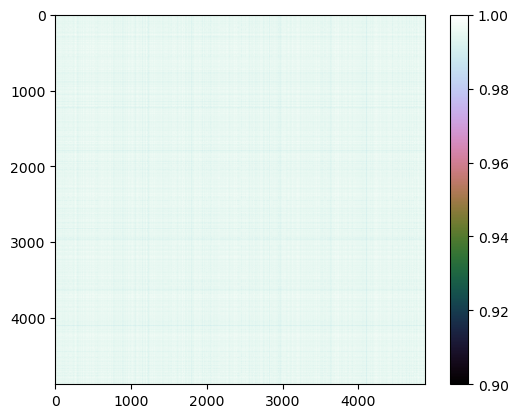

In [270]:
plt.imshow(IM,  cmap="cubehelix")
plt.clim(0.9,1)
plt.colorbar()

In [254]:
IM[indexes][:,indexes,0].shape

(1000, 1000)

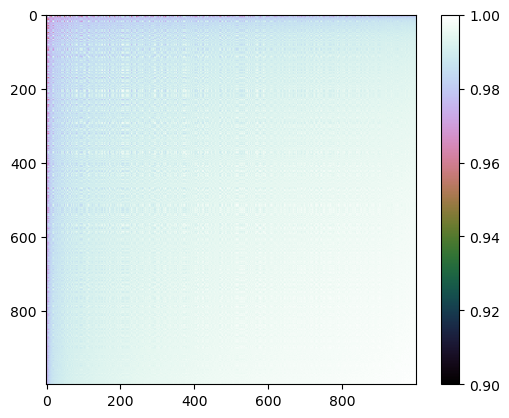

In [269]:
plt.imshow(IM[indexes][:,indexes,0], cmap="cubehelix")
plt.clim(0.9,1)
plt.colorbar()
